In [1013]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import pandas_datareader as web
import datetime as dt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import talib
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score,average_precision_score,precision_score,confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor


In [1441]:
start="1-1-1990"
end=dt.datetime.today()
ticker="^BSESN"
data=web.DataReader(ticker,"yahoo",start,end)
inv=10000
data['Pct Change']=data['Close'].pct_change()*100
data

,High,Low,Open,Close,Volume,Adj Close,Pct Change
Date,,,,,,,
1997-07-01,4301.770020,4247.660156,4263.109863,4300.859863,0.0,4300.859863,NaN
1997-07-02,4395.310059,4295.399902,4302.959961,4333.899902,0.0,4333.899902,0.768219
1997-07-03,4393.290039,4299.970215,4335.790039,4323.459961,0.0,4323.459961,-0.240890
1997-07-04,4347.589844,4300.580078,4332.700195,4323.819824,0.0,4323.819824,0.008324
1997-07-07,4391.009766,4289.490234,4326.810059,4291.450195,0.0,4291.450195,-0.748635
...,...,...,...,...,...,...,...
2020-07-06,36661.660156,36254.019531,36313.460938,36487.281250,22300.0,36487.281250,1.293284
2020-07-07,36723.269531,36271.089844,36660.351562,36674.519531,20600.0,36674.519531,0.513160
2020-07-08,36828.429688,36234.171875,36738.378906,36329.011719,24800.0,36329.011719,-0.942092


In [1442]:
#Feature Engineering
fdata=pd.DataFrame(index=data.index)
fdata['DReturn']=(data['Close']/data['Open']).apply(np.log)
fdata['Vol']=data['Volume'].apply(np.log)
fdata['High']=data['High'].apply(np.log)
fdata['Close']=data['Close']
fdata[f'Vol Diff 16']=data['Volume'].diff(16)
fdata['Vol Diff 50'] = data['Volume'].diff(50)
fdata['pctc'] = data[['Volume']].astype(int).apply(lambda x: x.pct_change()) 
for i in range(1,10):
    fdata[f'mavg{i}']=(data['Adj Close'].rolling(i).mean()).dropna()
fdata['std']=data['Adj Close'].rolling(30).mean().dropna()
#fdata['mr']=data['Adj Close']/data['Adj Close'].shift(1)
period=np.arange(1,31)
#for i in range(1,10):
    #name = 'LaggedReturn_' + str(i)
    #fdata[name] = data['Close'].pct_change(periods=i)
for i in range(1, len(period)):
    fdata['SMA-%i'%period[i]] = talib.MA(data['Close'], timeperiod=period[i])
for i in range(1, len(period)):
    fdata['EMA-%i'%period[i]] = talib.EMA(data['Close'], timeperiod=period[i])
#fdata['OBV']=talib.OBV(data['Close'], data['Volume'])
#fdata['HT_TRENDLINE']=talib.HT_TRENDLINE(data['Close'])
#fdata['AVGPRICE'] = talib.AVGPRICE(data['Open'],data['High'], data['Low'], data['Close'])
#fdata['CDLCOUNTERATTACK']=talib.CDLCOUNTERATTACK(data['Open'],data['High'], data['Low'], data['Close'])
for i in range(1, len(period)):
    fdata['ROC-%i'%period[i]] = talib.ROC(data['Close'], period[i])  
for i in range(1, len(period)):
    fdata['MOM-%i'%period[i]] = talib.MOM(data['Close'], period[i])
for i in range(8, len(period), 6):
    fdata['ATR-%i'%i] = talib.ATR(data['High'], data['Low'], data['Close'], timeperiod=i)
for i in range(8, len(period), 6):
    fdata['RSI-%i'%i] = talib.RSI(data['Close'], i)
for i in range(8, len(period), 6):
    fdata['TRANGE-%i'%i] = talib.TRANGE(data['High'], data['Low'], data['Close'])
#for i in range(10, len(data)):
    #fdata['BBANDS-%i'%i] = talib.BBANDS(data['Close'], timeperiod=i, nbdevup=2, nbdevdn=2, matype=0)
for i in range(1, len(period)):
    fdata['VAR-%i'%i] = talib.VAR(data['Close'], i)
for i in range(2, len(period)):
    fdata['KAMA-%i'%i] = talib.KAMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['TEMA-%i'%i] = talib.TEMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['TRIMA-%i'%i] = talib.TRIMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ULTOSC-%i'%i] = talib.ULTOSC(data['High'],data['Low'],data['Close'], timeperiod1=i, timeperiod2=i*2, timeperiod3=i*3)
for i in range(2, len(period)):
    fdata['PPO-%i'%i] = talib.PPO(data['Close'], fastperiod=i, slowperiod=i*2, matype=0)
for i in range(2, len(period)):
    fdata['ROCR100-%i'%i] = talib.ROCR100(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ROCR-%i'%i] = talib.ROCR(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['TRIX-%i'%i] = talib.TRIX(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ADXR-%i'%i] = talib.ADXR(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['MINUS_DI-%i'%i] = talib.MINUS_DI(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['WILLR-%i'%i] = talib.WILLR(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ROCP-%i'%i] = talib.ROCP(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['DX-%i'%i] = talib.DX(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(len(period)*2,len(period)*5 ):
    fdata['VAR-%i'%i] = talib.VAR(data['Close'], timeperiod=i, nbdev=5)
for i in range(2, len(period)):
    fdata['CMO-%i'%i] = talib.CMO(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ADX-%i'%i] = talib.ADX(data['High'],data['Low'],data['Close'], timeperiod=i)

0.9996219420835775 mavg1
0.9995234618134721 mavg2
0.9993993017342757 mavg3
0.9992701307659582 mavg4
0.9991403557766907 mavg5
0.9990031657887605 mavg6
0.998871362115649 mavg7
0.9987360702329302 mavg8
0.998598437396347 mavg9
0.9954419471869279 std
0.9995234618134721 SMA-2
0.9993993017342757 SMA-3
0.9992701307659582 SMA-4
0.9991403557766907 SMA-5
0.9990031657887605 SMA-6
0.998871362115649 SMA-7
0.9987360702329302 SMA-8
0.998598437396347 SMA-9
0.9984587147770572 SMA-10
0.9983126692145022 SMA-11
0.9981666233143416 SMA-12
0.9980172419331329 SMA-13
0.9978662816166495 SMA-14
0.997714523071274 SMA-15
0.9975605564198893 SMA-16
0.9974066096623593 SMA-17
0.9972511436142455 SMA-18
0.9970957479914212 SMA-19
0.9969408007579236 SMA-20
0.9967860177668403 SMA-21
0.9966322096927344 SMA-22
0.9964790303778046 SMA-23
0.9963267472522228 SMA-24
0.9961762814100237 SMA-25
0.9960271228742987 SMA-26
0.9958790195036088 SMA-27
0.9957322794974091 SMA-28
0.9955864594480958 SMA-29
0.9954419471869279 SMA-30
0.999569635

['mavg1',
 'mavg2',
 'mavg3',
 'mavg4',
 'mavg5',
 'mavg6',
 'mavg7',
 'mavg8',
 'mavg9',
 'std',
 'SMA-2',
 'SMA-3',
 'SMA-4',
 'SMA-5',
 'SMA-6',
 'SMA-7',
 'SMA-8',
 'SMA-9',
 'SMA-10',
 'SMA-11',
 'SMA-12',
 'SMA-13',
 'SMA-14',
 'SMA-15',
 'SMA-16',
 'SMA-17',
 'SMA-18',
 'SMA-19',
 'SMA-20',
 'SMA-21',
 'SMA-22',
 'SMA-23',
 'SMA-24',
 'SMA-25',
 'SMA-26',
 'SMA-27',
 'SMA-28',
 'SMA-29',
 'SMA-30',
 'EMA-2',
 'EMA-3',
 'EMA-4',
 'EMA-5',
 'EMA-6',
 'EMA-7',
 'EMA-8',
 'EMA-9',
 'EMA-10',
 'EMA-11',
 'EMA-12',
 'EMA-13',
 'EMA-14',
 'EMA-15',
 'EMA-16',
 'EMA-17',
 'EMA-18',
 'EMA-19',
 'EMA-20',
 'EMA-21',
 'EMA-22',
 'EMA-23',
 'EMA-24',
 'EMA-25',
 'EMA-26',
 'EMA-27',
 'EMA-28',
 'EMA-29',
 'EMA-30',
 'KAMA-2',
 'KAMA-3',
 'KAMA-4',
 'KAMA-5',
 'KAMA-6',
 'KAMA-7',
 'KAMA-8',
 'KAMA-9',
 'KAMA-10',
 'KAMA-11',
 'KAMA-12',
 'KAMA-13',
 'KAMA-14',
 'KAMA-15',
 'KAMA-16',
 'KAMA-17',
 'KAMA-18',
 'KAMA-19',
 'KAMA-20',
 'KAMA-21',
 'KAMA-22',
 'KAMA-23',
 'KAMA-24',
 'KAMA-25',


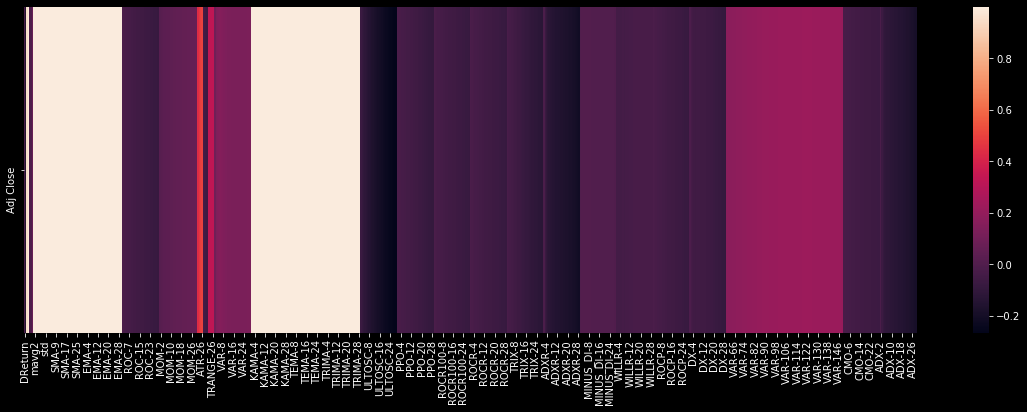

In [1443]:
highest=0
for col in range(len(fdata.columns)):
    if fdata.reset_index(drop=True).iloc[:,col].first_valid_index()>highest:
        highest=fdata.iloc[:,col].reset_index(drop=True).first_valid_index()
corrd=fdata[highest:]
corco=pd.DataFrame(data=corrd).reset_index()
corco.insert(0,'Adj Close',data['Close'].shift(-1)[highest:].values)
plt.figure(figsize=(20,6))
corr=corco.corr().iloc[:1, 1:]
sns.heatmap(corr)
hf=[]
for col in corr.columns:
    if corr[col].loc['Adj Close']>0.9:
        if col!='Adj Close' and col!='Pct Change' and col!='DReturn'and col!='High' and col!='Close'and col!='Low':
            print(corr[col]['Adj Close'], col)
            hf.append(col)
hf

In [1444]:

#X=fdata[['ROC-2','ROC-3','ROCR-2','ROCR-3','ROCP-2','ROCP-3','MOM-2', 'ROCR100-2', 'Close']].dropna()
X=fdata[hf]
highest=0
for col in range(len(X.columns)):
    if X.reset_index(drop=True).iloc[:,col].first_valid_index()>highest:
        highest=X.iloc[:,col].reset_index(drop=True).first_valid_index()
last=X[-1:]
X=X[highest:][:-1]#.dropna()
#X=fdata[['Close']][highest:].dropna()
y=data['Close'][highest:].shift(-1).dropna()
tpec=0.75
size=int(len(X)*tpec)
X_train= X[0:size]
X_test = X[size:]
y_train= y[0:size]
y_test= y[size:]
y_train=y_train.astype('float')
y_test=y_test.astype('float')

In [1418]:
X_train, y_train, data['Close'][85:]

(                   mavg1         mavg2         mavg3         mavg4  \
 Date                                                                 
 1997-11-05   3778.229980   3792.089966   3791.666667   3794.559998   
 1997-11-06   3763.959961   3771.094971   3782.713298   3784.739990   
 1997-11-07   3747.320068   3755.640015   3763.170003   3773.864990   
 1997-11-10   3721.050049   3734.185059   3744.110026   3752.640015   
 1997-11-11   3723.399902   3722.224976   3730.590007   3738.932495   
 ...                  ...           ...           ...           ...   
 2014-10-17  26108.529297  26053.934570  26152.399740  26210.317383   
 2014-10-20  26429.849609  26269.189453  26179.239583  26221.762207   
 2014-10-21  26575.650391  26502.750000  26371.343099  26278.342285   
 2014-10-22  26787.230469  26681.440430  26597.576823  26475.314941   
 2014-10-27  26752.900391  26770.065430  26705.260417  26636.407715   
 
                    mavg5         mavg6         mavg7         mavg8  \
 Dat

In [1427]:
param={"hidden_layer_sizes": [(1,),(50,)], 
       "activation": ["identity", "logistic", "tanh", "relu"], 
       "solver": ["lbfgs", "sgd", "adam"], 
       "alpha": [0.00005,0.0005]}

modelm=RandomizedSearchCV(MLPRegressor(), param)
modelm.fit(X_train, y_train)
pred=modelm.predict(X_test)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])

/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

In [1449]:
modelm=MLPRegressor(solver='lbfgs')
modelm.fit(X_train, y_train)
pred=modelm.predict(X_test)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])

/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [1453]:
modelm=LinearRegression()
modelm.fit(X_train, y_train)
pred=modelm.predict(X_test)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])

Tomorrow's Prediction:  [[36589.67950328]]


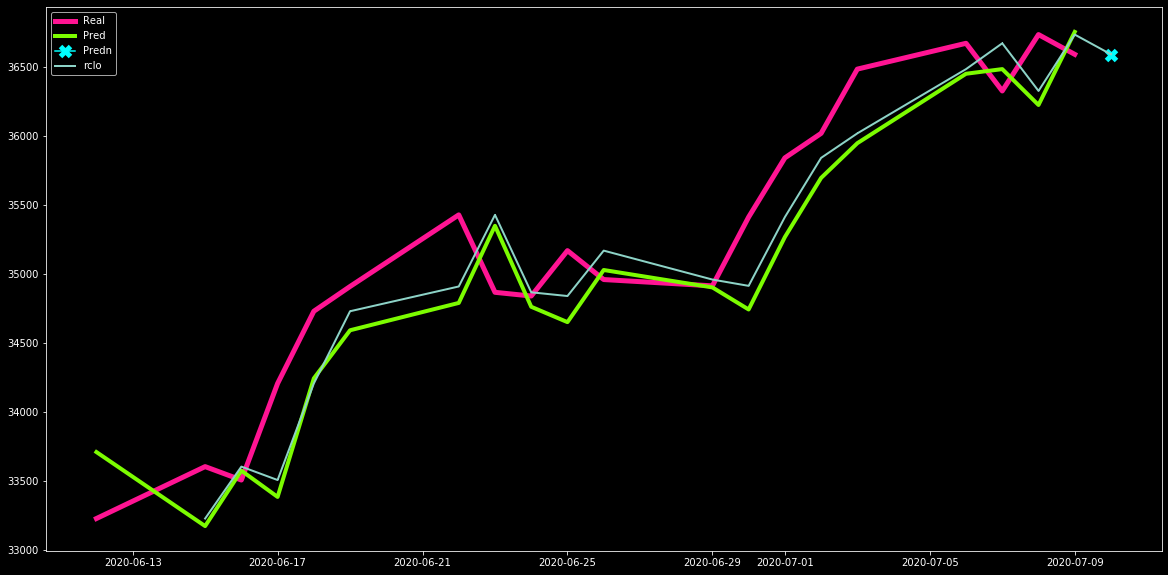

Error in Points:  236.70537259598532


In [1454]:
# print("Percentage Error: ", round((mae(pred, y_test[:213])/data['Adj Close'][-1])*100, 3),"%")
#for i in range(0,len(pred.columns)):
    #plt.plot(np.array(pred.iloc[:,i].shift(27)),label=pred.iloc[:,i].name, linewidth=2)
plt.figure(figsize=(20,10))
plt.plot(y_test[-20:],label="Real", color="deeppink",linewidth=5)
plt.plot(pred['Prediction'][-20:],color="lawngreen", linewidth=4,label="Pred")
lastpred=model.predict(last)
lastpred=pd.DataFrame(data=lastpred,index=last.index)
print("Tomorrow's Prediction: ", lastpred.values)
plt.plot(lastpred,marker='x', ms=10,label="Predn", mew=5, color='aqua')
plt.plot(data['Close'][highest:][-20:],marker=',', linewidth=2,label="rclo")
plt.legend()
plt.show()
print("Error in Points: ",mae(y_test, pred))
#model.best_params_

In [1452]:
data['Close'][-20:], lastpred, y_test[-10:]

(Date
 2020-06-15    33228.800781
 2020-06-16    33605.218750
 2020-06-17    33507.921875
 2020-06-18    34208.050781
 2020-06-19    34731.730469
 2020-06-22    34911.320312
 2020-06-23    35430.429688
 2020-06-24    34868.980469
 2020-06-25    34842.101562
 2020-06-26    35171.269531
 2020-06-29    34961.519531
 2020-06-30    34915.800781
 2020-07-01    35414.449219
 2020-07-02    35843.699219
 2020-07-03    36021.421875
 2020-07-06    36487.281250
 2020-07-07    36674.519531
 2020-07-08    36329.011719
 2020-07-09    36737.691406
 2020-07-10    36594.328125
 Name: Close, dtype: float64,
                        0
 Date                    
 2020-07-10  36589.679503,
 Date
 2020-06-26    34961.519531
 2020-06-29    34915.800781
 2020-06-30    35414.449219
 2020-07-01    35843.699219
 2020-07-02    36021.421875
 2020-07-03    36487.281250
 2020-07-06    36674.519531
 2020-07-07    36329.011719
 2020-07-08    36737.691406
 2020-07-09    36594.328125
 Name: Close, dtype: float64)

In [1402]:
pred['Movement']=None
for i in range(1,len(pred)):
    if pred['Prediction'].iloc[i]>y_test.iloc[i-1]:
        pred['Movement'].iloc[i]=1
    elif pred['Prediction'].iloc[i]<y_test.iloc[i-1]:
        pred['Movement'].iloc[i]= -1
    else:
        pred['Movement'].iloc[i]=0
pred['Movement']=pred['Movement'].shift(-1)
predp=pd.DataFrame()
predp=pred['Movement'].dropna()
predp=predp.astype('int')

In [1403]:
y_test=pd.DataFrame(data=y_test)
y_testp=pd.DataFrame(index=y_test.index)
y_test['Pct Change']=y_test.pct_change()
y_testp['Movement']=None
for i in range(len(y_test)):
    if y_test['Pct Change'].iloc[i]<0:
        y_testp['Movement'].iloc[i]=-1
    elif y_test['Pct Change'].iloc[i]>0:
        y_testp['Movement'].iloc[i]=1
    else:
        y_testp['Movement'].iloc[i]=0
y_testp['Movement']=y_testp['Movement'].shift(-1)
y_testp=y_testp.dropna()
y_testp=y_testp.astype('int')

In [1407]:
accuracy_score(y_testp['Movement'],predp)
conf=confusion_matrix(y_testp['Movement'], predp, labels=[-1,1])
conf

array([[320, 446],
       [376, 560]])

model.predict(last)

In [ ]:
lastpred=model.predict(last)
lastpred=pd.DataFrame(data=lastpred,index=last.index)
print("Tomorrow's Prediction: ", lastpred.values)

In [718]:
lastpred=pd.DataFrame(data=lastpred, index=last.index)
lastpred

,0
Date,
2020-07-09,312.709267


In [947]:
y_test, pred

(Date
 2014-10-27    26880.820312
 2014-10-28    27098.169922
 2014-10-29    27346.330078
 2014-10-30    27865.830078
 2014-10-31    27860.380859
                   ...     
 2020-07-03    36487.281250
 2020-07-06    36674.519531
 2020-07-07    36329.011719
 2020-07-08    36737.691406
 2020-07-09             NaN
 Name: Close, Length: 1396, dtype: float64,
                        0
 Date                    
 2014-10-27  26799.080910
 2014-10-28  26929.059412
 2014-10-29  27118.469324
 2014-10-30  27318.626708
 2014-10-31  27678.802643
 ...                  ...
 2020-07-02  35672.538116
 2020-07-03  35896.077129
 2020-07-06  36245.420508
 2020-07-07  36590.308029
 2020-07-08  36570.750405
 
 [1395 rows x 1 columns])

In [529]:
model.predict(last)

array([316.40120104])

In [530]:
data['Close']

Date
1993-01-29     43.937500
1993-02-01     44.250000
1993-02-02     44.343750
1993-02-03     44.812500
1993-02-04     45.000000
                 ...    
2020-07-01    310.519989
2020-07-02    312.230011
2020-07-06    317.049988
2020-07-07    313.779999
2020-07-08    316.179993
Name: Close, Length: 6910, dtype: float64